# Data exploration

## Preliminaries

### Imports

In [1]:
import sys
import os
sys.path.append('./src')

In [2]:
import pickle
import bz2

In [3]:
from joblib import Parallel
from joblib import delayed
from joblib import parallel_backend

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
from statistics import mean, stdev

In [7]:
from nltk.tokenize import word_tokenize

In [111]:
import pandas as pd
pd.set_option('display.max_rows', 80)

### Constants and global variables

In [9]:
SPLITS = ('train', 'validation', 'test')
DATA_SETS = ('DailyDialog', 'EmpatheticDialogues', 'Persona-Chat', 'Wizard of Wikipedia', 'HOPE')

In [20]:
DATA_PATH = '../resources/data/cache/'

In [92]:
DA_MAP = {
    'Clarification Request': 'Speaker Initiative',
    'Opinion Request': 'Speaker Initiative',
    'Information Request': 'Speaker Initiative',
    'Yes/No question': 'Speaker Initiative',
    'Greeting': 'General',
    'Acknowledgement': 'General',
    'General Chat': 'General',
    'Information Delivery': 'Speaker Responsive',
    'Positive Answer': 'Speaker Responsive',
    'Clarification Delivery': 'Speaker Responsive',
    'Negative Answer': 'Speaker Responsive',
    'Opinion Delivery': 'Speaker Responsive',
}

### Helper functions

In [11]:
def load_data(path):
    # Open the BZIP2 file
    with bz2.BZ2File(path, 'r') as f:
        # Read the content with Pickle
        data = pickle.load(f)
    # Return loaded data
    return data

In [41]:
def group_by(data, group):
    # Initialise a dictionary to store the groups
    grouped_data = {value: [] for value in {sample[group] for sample in data}}
    # Go through the data set and add each sample to the correct group
    for sample in data:
        if sample[group] in grouped_data:
            grouped_data[sample[group]].append(sample)
        else:
            grouped_data[sample[group]]= [sample]
    # Return grouped data
    return grouped_data

In [25]:
def compute_metadata(data):
    # Helper function to compute the desired info on a single sample
    def get_metadata(sample):
        return {'corpus': sample['corpus'], 'conversation_idx': sample['conversation_idx'], 'n_tokens': len(word_tokenize(sample['response']))}
    # Define parallel backend to compute the desired metadata
    with parallel_backend('threading', n_jobs=-1):
        # Compute No. of tokens for each turn of each dialogue in each corpus (mantaing the splitting info)
        metadata = Parallel(verbose=2)(delayed(get_metadata)(sample) for sample in data)
    # Return computed metadata
    return metadata

In [55]:
def compute_stats(data):
    # Group data by dialogue identifier
    grouped_data = group_by(data, 'conversation_idx')
    # Compute number of different dialogues
    n_dialogues = len(grouped_data)
    # Compute mean and standard deviation of dialogues length
    mean_n_turns = mean(len(group) for group in grouped_data.values())
    std_n_turns = stdev(len(group) for group in grouped_data.values())
    # Compute mean and standard deviation of tokens per turn length
    mean_n_tokens = mean(sample['n_tokens'] for sample in data)
    std_n_tokens = stdev(sample['n_tokens'] for sample in data)
    # Return computed statistics
    return n_dialogues, (mean_n_turns, std_n_turns), (mean_n_tokens, std_n_tokens)

## Data

### Load data

In [21]:
data = {
    split: load_data(os.path.join(DATA_PATH, f'evaluation_corpus_{split}.pbz2')) for split in SPLITS
}

### Compute stats

In [26]:
metadata = {split: compute_metadata(samples) for split, samples in data.items()}

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 9089 tasks   

In [ ]:
for v in metadata.values():
    print(type

In [59]:
for split, info in metadata.items():
    print(f'Split: {split}')
    for sub_set, sub_set_info in group_by(info, 'corpus').items():
        print(f'\tSub set: {sub_set}')
        n_dialogues, (mean_n_turns, std_n_turns), (mean_n_tokens, std_n_tokens) = compute_stats(sub_set_info)
        print(f'\t\tNo. of dialogues: {n_dialogues:5d}, No. of turns per dialogue: {mean_n_turns:3.1f}({std_n_turns:3.1f}), No. of tokens per turn: {mean_n_tokens:3.1f}({std_n_tokens:3.1f}),')
    print('\tTotal:')
    n_dialogues, (mean_n_turns, std_n_turns), (mean_n_tokens, std_n_tokens) = compute_stats(info)
    print(f'\t\tNo. of dialogues: {n_dialogues:5d}, No. of turns per dialogue: {mean_n_turns:3.1f}({std_n_turns:3.1f}), No. of tokens per turn: {mean_n_tokens:3.1f}({std_n_tokens:3.1f}),')
n_dialogues, (mean_n_turns, std_n_turns), (mean_n_tokens, std_n_tokens) = compute_stats(sum((info for info in metadata.values()), list()))
print('Total')
print(f'\tNo. of dialogues: {n_dialogues:5d}, No. of turns per dialogue: {mean_n_turns:3.1f}({std_n_turns:3.1f}), No. of tokens per turn: {mean_n_tokens:3.1f}({std_n_tokens:3.1f}),')

Split: train
	Sub set: EmpatheticDialogues
		No. of dialogues: 19533, No. of turns per dialogue: 4.3(0.7), No. of tokens per turn: 15.6(9.6),
	Sub set: Persona-Chat
		No. of dialogues:  8939, No. of turns per dialogue: 14.7(1.7), No. of tokens per turn: 11.7(4.1),
	Sub set: DailyDialog
		No. of dialogues: 11118, No. of turns per dialogue: 7.8(4.0), No. of tokens per turn: 14.0(10.5),
	Sub set: Wizard of Wikipedia
		No. of dialogues: 18430, No. of turns per dialogue: 9.0(1.0), No. of tokens per turn: 18.9(9.1),
	Sub set: HOPE
		No. of dialogues:   149, No. of turns per dialogue: 63.2(40.5), No. of tokens per turn: 26.5(36.8),
	Total:
		No. of dialogues: 19533, No. of turns per dialogue: 24.5(14.0), No. of tokens per turn: 15.6(10.4),
Split: validation
	Sub set: EmpatheticDialogues
		No. of dialogues:  2770, No. of turns per dialogue: 4.4(0.7), No. of tokens per turn: 16.7(9.5),
	Sub set: Persona-Chat
		No. of dialogues:  1000, No. of turns per dialogue: 15.6(1.0), No. of tokens per turn

### Visualise distributions

In [82]:
hope = {split: [sample for sample in data[split] if sample['corpus'] == 'HOPE'] for split in data}

In [102]:
hope_metadata = {split: [
    (sample['speaker'], 
     sample['dialogue_act'], 
     DA_MAP.get(sample['dialogue_act']), 
     len(word_tokenize(sample['response']))) 
    for sample in hope[split]
] for split in hope}

In [103]:
df = pd.DataFrame(
    data=[(split.capitalize(), *sample) for split in hope_metadata for sample in hope_metadata[split]],
    columns=['Split', 'Speaker', 'Dialogue act', 'Act type', 'No. of tokens']
)

In [104]:
df.groupby('Dialogue act').size()

Dialogue act
Acknowledgement            940
Clarification Delivery     950
Clarification Request      995
General Chat              2049
Greeting                   480
Information Delivery      3096
Information Request       2076
Negative Answer            371
Opinion Delivery           317
Opinion Request            233
Positive Answer            387
Yes/No question            929
dtype: int64

In [105]:
df.groupby(['Act type']).size()

Act type
General               3469
Speaker Initiative    4233
Speaker Responsive    5121
dtype: int64

In [106]:
df.groupby(['Speaker', 'Dialogue act']).size()

Speaker    Dialogue act          
Patient    Acknowledgement            767
           Clarification Delivery     846
           Clarification Request       93
           General Chat               797
           Greeting                   204
           Information Delivery      2597
           Information Request         33
           Negative Answer            364
           Opinion Delivery           268
           Opinion Request              4
           Positive Answer            375
           Yes/No question             18
Therapist  Acknowledgement            173
           Clarification Delivery     104
           Clarification Request      902
           General Chat              1252
           Greeting                   276
           Information Delivery       499
           Information Request       2043
           Negative Answer              7
           Opinion Delivery            49
           Opinion Request            229
           Positive Answer             12


In [107]:
df.groupby(['Speaker', 'Act type']).size()

Speaker    Act type          
Patient    General               1768
           Speaker Initiative     148
           Speaker Responsive    4450
Therapist  General               1701
           Speaker Initiative    4084
           Speaker Responsive     671
dtype: int64

In [108]:
df.groupby(['Split', 'Dialogue act']).size()

Split       Dialogue act          
Test        Acknowledgement            128
            Clarification Delivery     186
            Clarification Request      197
            General Chat               359
            Greeting                    76
            Information Delivery       532
            Information Request        383
            Negative Answer             66
            Opinion Delivery            55
            Opinion Request             34
            Positive Answer             79
            Yes/No question            139
Train       Acknowledgement            733
            Clarification Delivery     662
            Clarification Request      695
            General Chat              1488
            Greeting                   365
            Information Delivery      2277
            Information Request       1496
            Negative Answer            278
            Opinion Delivery           243
            Opinion Request            184
            Positiv

In [109]:
df.groupby(['Split', 'Act type']).size()

Split       Act type          
Test        General                563
            Speaker Initiative     753
            Speaker Responsive     918
Train       General               2586
            Speaker Initiative    3080
            Speaker Responsive    3734
Validation  General                320
            Speaker Initiative     400
            Speaker Responsive     469
dtype: int64

In [110]:
df.groupby(['Split', 'Speaker', 'Dialogue act']).size()

Split       Speaker    Dialogue act          
Test        Patient    Acknowledgement             97
                       Clarification Delivery     172
                       Clarification Request       13
                       General Chat               137
                       Greeting                    32
                       Information Delivery       466
                       Information Request          7
                       Negative Answer             66
                       Opinion Delivery            48
                       Positive Answer             73
                       Yes/No question              6
            Therapist  Acknowledgement             31
                       Clarification Delivery      14
                       Clarification Request      184
                       General Chat               222
                       Greeting                    44
                       Information Delivery        66
                       Information R

In [112]:
df.groupby(['Split', 'Speaker', 'Act type']).size()

Split       Speaker    Act type          
Test        Patient    General                266
                       Speaker Initiative      26
                       Speaker Responsive     825
            Therapist  General                297
                       Speaker Initiative     727
                       Speaker Responsive      93
Train       Patient    General               1337
                       Speaker Initiative     110
                       Speaker Responsive    3210
            Therapist  General               1249
                       Speaker Initiative    2969
                       Speaker Responsive     524
Validation  Patient    General                165
                       Speaker Initiative      12
                       Speaker Responsive     415
            Therapist  General                155
                       Speaker Initiative     388
                       Speaker Responsive      54
dtype: int64

In [159]:
tmp_df = df.groupby(['Split', 'Speaker', 'Dialogue act'], sort=False).size().reset_index()
tmp_df

,Split,Speaker,Dialogue act,0
0,Train,Therapist,Information Request,1473
1,Train,Patient,Acknowledgement,607
2,Train,Therapist,Information Delivery,392
3,Train,Patient,Yes/No question,12
4,Train,Therapist,Negative Answer,7
5,Train,Patient,General Chat,575
6,Train,Therapist,General Chat,913
7,Train,Therapist,Clarification Request,623
8,Train,Patient,Clarification Delivery,582
9,Train,Therapist,Greeting,210


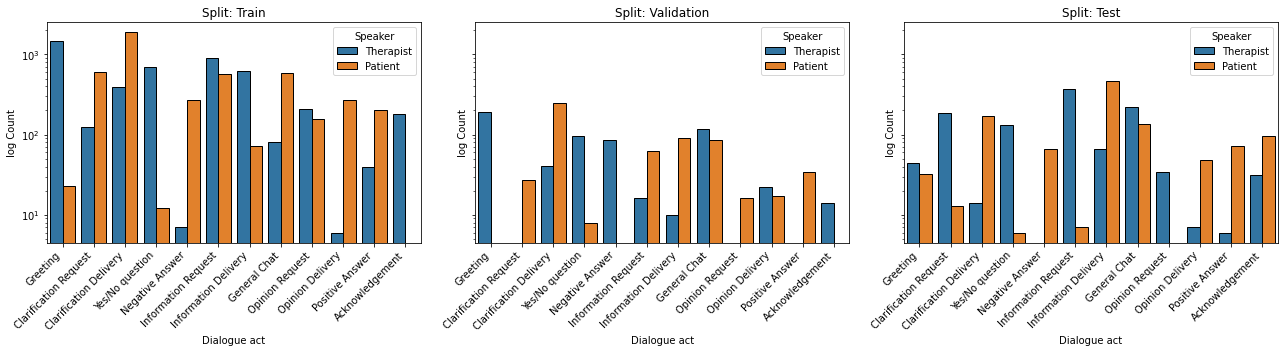

In [181]:
colours = ['tab:blue', 'tab:red', 'tab:green']

fig, axes = plt.subplots(nrows=1, ncols=len(tmp_df['Split'].unique()), figsize=(18, 5), sharex=True, sharey=True)

for i, (split, split_df) in enumerate(tmp_df.groupby('Split', sort=False)):
    sns.barplot(data=split_df, hue='Speaker', x='Dialogue act', y=0, ax=axes[i], linewidth=1., edgecolor='0')
    axes[i].set_title(f'Split: {split}')
    axes[i].set_ylabel('log Count')
    axes[i].set_xticklabels(split_df['Dialogue act'].unique(), rotation=45, ha='right')
    axes[i].set_yscale('log')
plt.tight_layout()
plt.show()

In [176]:
tmp_df = df.groupby(['Split', 'Speaker', 'Act type'], sort=False).size().reset_index()
tmp_df

,Split,Speaker,Act type,0
0,Train,Therapist,Speaker Initiative,2969
1,Train,Patient,General,1337
2,Train,Therapist,Speaker Responsive,524
3,Train,Patient,Speaker Initiative,110
4,Train,Therapist,General,1249
5,Train,Patient,Speaker Responsive,3210
6,Validation,Therapist,Speaker Initiative,388
7,Validation,Patient,Speaker Responsive,415
8,Validation,Therapist,General,155
9,Validation,Patient,General,165


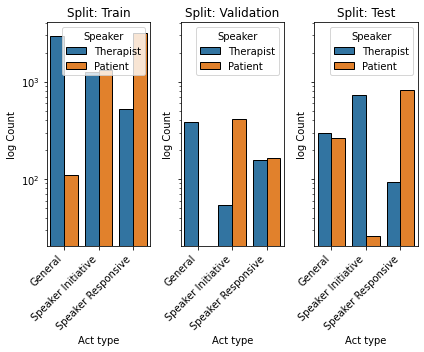

In [177]:
colours = ['tab:blue', 'tab:red', 'tab:green']

fig, axes = plt.subplots(nrows=1, ncols=len(tmp_df['Split'].unique()), figsize=(6, 5), sharex=True, sharey=True)

for i, (split, split_df) in enumerate(tmp_df.groupby('Split', sort=False)):
    sns.barplot(data=split_df, hue='Speaker', x='Act type', y=0, ax=axes[i], linewidth=1., edgecolor='0')
    axes[i].set_title(f'Split: {split}')
    axes[i].set_ylabel('log Count')
    axes[i].set_xticklabels(split_df['Act type'].unique(), rotation=45, ha='right')
    axes[i].set_yscale('log')
plt.tight_layout()
plt.show()